In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 

from astropy.time import Time

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [20]:
J05_file = 'J:A+A:440:735:table2.dat.csv'
new_file = 'light_curve_53d97e77-9ed7-4d90-ba7e-8a1f4cf7b50f.csv'

J05 = pd.read_csv(J05_file)
J05_Vmag=7.567

# from https://asas-sn.osu.edu/light_curves/53d97e77-9ed7-4d90-ba7e-8a1f4cf7b50f
asas = pd.read_csv(new_file)

print(J05.columns)
print(asas.columns)

Index([u'star', u'hjd', u'dv', u'err'], dtype='object')
Index([u'HJD', u'UT Date', u'Camera', u'FWHM', u'Limit', u'mag', u'mag_err',
       u'flux(mJy)', u'flux_err'],
      dtype='object')


In [74]:
# from Zac's repo directly!
nuv_file = 'https://raw.githubusercontent.com/ZacheryLaycock/GALEX_MtWilson/master/EKDra.csv'
galex = pd.read_csv(nuv_file)
# galex

nuv_jd = np.zeros(galex.shape[0], dtype=np.float)
for k in range(galex.shape[0]):
    t = Time(pd.to_datetime(galex['minPhotoObsDate'][k]).to_datetime(), scale ='utc')
    nuv_jd[k] = t.jd

In [27]:
# Zac used this file, but direct link to VizieR: http://cdsarc.u-strasbg.fr/viz-bin/Cat?J/A%2bA/393/225
old_file = 'http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat/txt?J%2FA%2BA%2F393%2F225/table7.dat'
MG02 = pd.read_table(old_file, names=('epoch', 'hjd0', 'hjd1', 'Nnights','V','source'), 
                     delimiter='|', skiprows=6, comment='-')
# MG

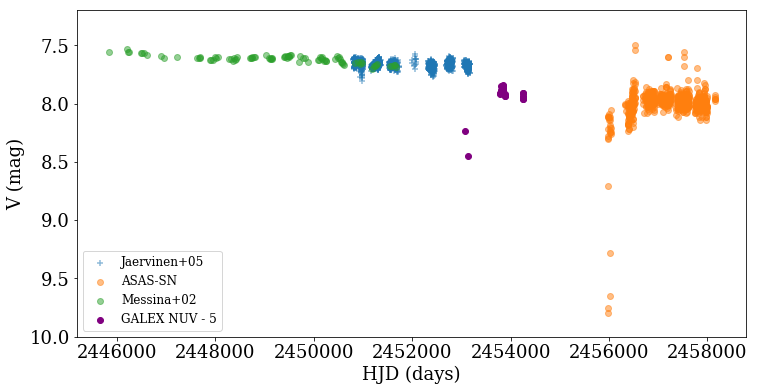

In [97]:
plt.figure(figsize=(12,6))

ekdra = J05[u'star']=='EKDRA'
plt.scatter(J05[u'hjd'][ekdra], J05[u'dv'][ekdra] + J05_Vmag, marker='+', alpha=0.5, label='Jaervinen+05')

aok = asas[u'mag'] < 20
plt.scatter(asas[u'HJD'][aok], asas[u'mag'][aok], alpha=0.5, label='ASAS-SN')

plt.scatter((MG02['hjd0']+MG02['hjd1'])/2., MG02['V'], alpha=0.5, label='Messina+02')

# plt.scatter(nuv_jd, galex[u'nuv_mag']-5, c='purple', label='GALEX NUV - 5')

plt.ylim(10,7.2)
plt.xlabel('HJD (days)')
plt.ylabel('V (mag)')
plt.legend(fontsize=12, loc='lower left')

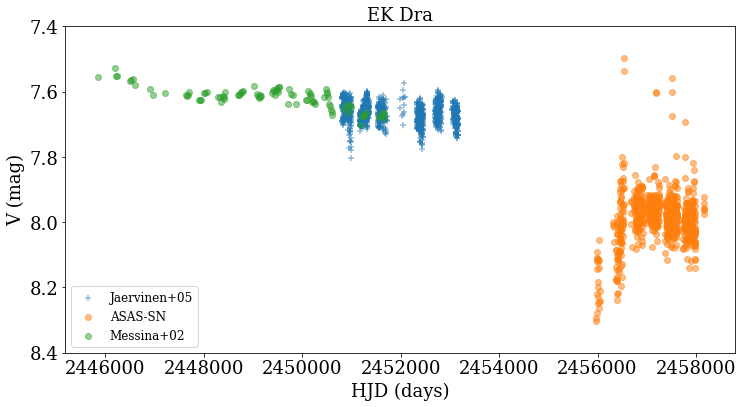

In [96]:
# Let's assume the very faint stuff from ASAS-SN is wrong (for now)

plt.figure(figsize=(12,6))

ekdra = J05[u'star']=='EKDRA'
plt.scatter(J05[u'hjd'][ekdra], J05[u'dv'][ekdra] + J05_Vmag, marker='+', alpha=0.5, label='Jaervinen+05')

aok = asas[u'mag'] < 20
plt.scatter(asas[u'HJD'][aok], asas[u'mag'][aok], alpha=0.5, label='ASAS-SN')

plt.scatter((MG02['hjd0']+MG02['hjd1'])/2., MG02['V'], alpha=0.5, label='Messina+02')

# plt.scatter(nuv_jd, galex[u'nuv_mag']-5, c='purple', label='GALEX NUV - 5')

plt.ylim(8.4,7.4)
plt.xlabel('HJD (days)')
plt.ylabel('V (mag)')
plt.title('EK Dra', fontsize=18)
plt.legend(fontsize=12, loc='lower left')
plt.savefig('EK_Dra_V.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

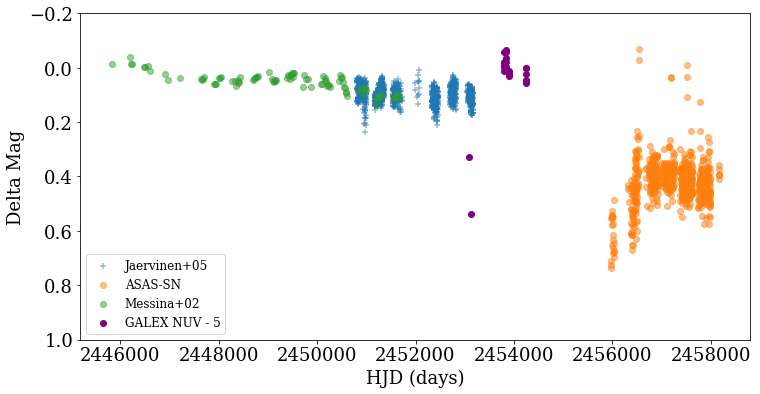

In [104]:
plt.figure(figsize=(12,6))

ekdra = J05[u'star']=='EKDRA'
plt.scatter(J05[u'hjd'][ekdra], J05[u'dv'][ekdra] , marker='+', alpha=0.5, label='Jaervinen+05')

aok = asas[u'mag'] < 20
plt.scatter(asas[u'HJD'][aok], asas[u'mag'][aok] - J05_Vmag, alpha=0.5, label='ASAS-SN')

plt.scatter((MG02['hjd0']+MG02['hjd1'])/2., MG02['V'] - J05_Vmag, alpha=0.5, label='Messina+02')

plt.scatter(nuv_jd, galex[u'nuv_mag']-np.median(galex[u'nuv_mag']), c='purple', label='GALEX NUV - 5')

plt.xlabel('HJD (days)')
plt.ylabel('Delta Mag')
plt.ylim(1, -0.2)
plt.legend(fontsize=12, loc='lower left')